# Single Membership Data with Outliers

In this notebook, we show that RTKM performs competitively with existing methods on single-membership data with outliers. 



In [2]:
from RTKM import *
from ClusteringMethods import *
from AccuracyMeasures import *
from plotting import load_figure_data, make_figure, load_figure

import numpy as np
import pandas as pd
import csv
from sklearn.decomposition import PCA
# 

# WBC Dataset

Load the Breast Cancer Wisconsin dataset.  This dataset contains 699 instances of tumors with 9 numerical attributes each. All of the instances are classified as either benignor malignant, of which we treat the latter as outliers.

In [2]:
wbc = pd.read_csv("datasets/breast-cancer-wisconsin.data", 
                   names = ['id', 'feature 1', 'feature 2', 'feature 3', 'feature 4', 'feature 5', 'feature 6', 'feature 7', 'feature 8', 'feature 9', 'class'],
                   delimiter = ',', quoting = 3)
wbc.replace('?', 0, inplace = True)

data = wbc[['feature 1', 'feature 2', 'feature 3', 'feature 4', 'feature 5', 'feature 6', 'feature 7', 'feature 8', 'feature 9']].to_numpy().astype(float)

classification = wbc['class'].to_numpy().astype(int)
point_classification = np.where(classification == 2, 1, 0)
outlier_classification = np.where(classification == 4, 1, 0)

true_labels = np.vstack((point_classification, outlier_classification))


Plot the dataset against its top two principle components.

Text(0.5, 1.0, 'WBC Data top 2 principal components')

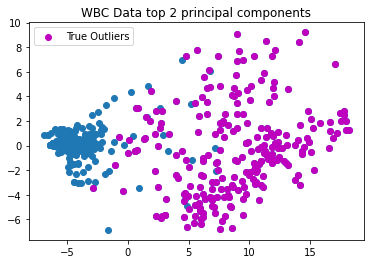

In [3]:
from sklearn.decomposition import PCA
pca = PCA(n_components=8)
pca.fit(data)
Xnew = pca.transform(data)
Xnew = Xnew.T

outliers = np.where(true_labels[1] == 1)
plt.figure()
plt.scatter(Xnew[0,:], Xnew[1,:])
plt.scatter(Xnew[0,outliers], Xnew[1,outliers], c = 'm', label = 'True Outliers')
plt.legend()
plt.title('WBC Data top 2 principal components')


In [4]:
data = data.T

# Run RTKM



 Number of true positives:  [447, 226] 

 Number of false positives :  [15, 11] 

 Number of true negatives:  [226, 447] 

 Number of false negatives:  [11, 15] 

 F1 scores for each cluster:  [0.97173913 0.94560669] 

 Average F1 score:  0.958672912497726 

 me score:  0.06671385894862325


Text(0.5, 1.0, 'PALM Trimmed for K-Means Clustering on WBC')

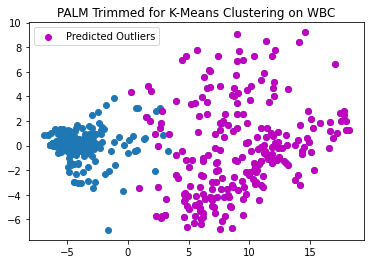

In [5]:
RTKM_WBC = RTKM(data)
RTKM_WBC.perform_clustering(k=1, percent_outliers = 0.34, max_iter = 500)

tp, fp, tn, fn, f1_scores, me = accuracy_measures(true_clusters = true_labels, pred_clusters = RTKM_WBC.weights, pred_outliers = RTKM_WBC.outliers, membership_option = 'single')

print('\n\n Number of true positives: ', tp, '\n\n Number of false positives : ', fp, 
      '\n\n Number of true negatives: ', tn, '\n\n Number of false negatives: ', fn, 
      '\n\n F1 scores for each cluster: ', f1_scores, '\n\n Average F1 score: ', np.average(f1_scores),
     '\n\n me score: ', me)

pred_clusters, pred_outliers = RTKM_WBC.return_clusters()

plt.figure()
plt.scatter(Xnew[0,:], Xnew[1,:])
plt.scatter(Xnew[0,pred_outliers], Xnew[1,pred_outliers], c= 'm', label= 'Predicted Outliers')
plt.legend()
plt.title('PALM Trimmed for K-Means Clustering on WBC')




# Run KMOR



 Number of true positives:  [447, 226] 

 Number of false positives :  [15, 11] 

 Number of true negatives:  [226, 447] 

 Number of false negatives:  [11, 15] 

 F1 scores for each cluster:  [0.97173913 0.94560669] 

 Average F1 score:  0.958672912497726 

 me score: 0.06671385894862325


Text(0.5, 1.0, 'PALM Trimmed for K-Means Clustering on WBC')

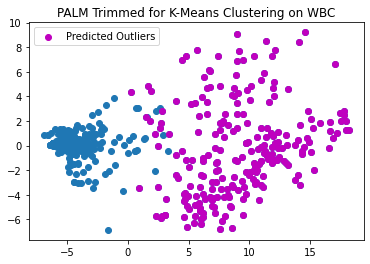

In [6]:
pred_labels_KMOR, pred_outliers_KMOR = run_kmor(data, k=1, percent_outliers= 0.34, gamma = 1)

tp, fp, tn, fn, f1_scores, me = accuracy_measures(true_clusters = true_labels, pred_clusters = pred_labels_KMOR, pred_outliers = pred_outliers_KMOR, membership_option = 'single')

print('\n\n Number of true positives: ', tp, '\n\n Number of false positives : ', fp, 
      '\n\n Number of true negatives: ', tn, '\n\n Number of false negatives: ', fn, 
      '\n\n F1 scores for each cluster: ', f1_scores, '\n\n Average F1 score: ', np.average(f1_scores),
     '\n\n me score:', me)

pred_outliers = np.where(pred_outliers_KMOR == 0)[0]
plt.figure()
plt.scatter(Xnew[0,:], Xnew[1,:])
plt.scatter(Xnew[0,pred_outliers], Xnew[1,pred_outliers], c= 'm', label= 'Predicted Outliers')
plt.legend()
plt.title('PALM Trimmed for K-Means Clustering on WBC')



# Run NEO

    _pyeval at line 57 column 30

***** iteration: 1, objective: 49275.258941
***** iteration: 2, objective: 49275.258941
***** No. of iterations done: 2
***** Total no. of data points: 699
***** alpha: 0.000, alphaN: 0
***** beta: 0.340, betaN: 238


 Number of true positives:  [458, 0] 

 Number of false positives :  [241, 0] 

 Number of true negatives:  [0, 458] 

 Number of false negatives:  [0, 241] 

 F1 scores for each cluster:  [0.79170268 0.        ] 

 Average F1 score:  0.3958513396715644 

 me score:  1.0


Text(0.5, 1.0, 'PALM Trimmed for K-Means Clustering on WBC')

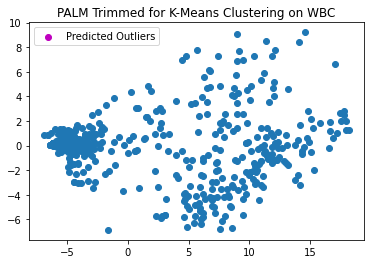

In [7]:
pred_labels_NEO, pred_outliers_NEO = run_neo(data, path_to_neo='/Users/olgadorabiala/Documents/Thesis/RTKM/neo_k_means_vector/neo_kmeans/neo_kmeans.m',
                                             k=1, percent_outliers=0.34, sigma = 0, init_centers = None)

tp, fp, tn, fn, f1_scores, me = accuracy_measures(true_clusters = true_labels, pred_clusters = pred_labels_NEO, pred_outliers = pred_outliers_NEO, membership_option = 'single')


print('\n\n Number of true positives: ', tp, '\n\n Number of false positives : ', fp, 
      '\n\n Number of true negatives: ', tn, '\n\n Number of false negatives: ', fn, 
      '\n\n F1 scores for each cluster: ', f1_scores, '\n\n Average F1 score: ', np.average(f1_scores), 
     '\n\n me score: ', me)

pred_outliers = np.where(pred_outliers_NEO == 0)[0]
plt.figure()
plt.scatter(Xnew[0,:], Xnew[1,:])
plt.scatter(Xnew[0,pred_outliers], Xnew[1,pred_outliers], c= 'm', label= 'Predicted Outliers')
plt.legend()
plt.title('PALM Trimmed for K-Means Clustering on WBC')




# Test sensitivty of all three methods to alpha

Load paper figure

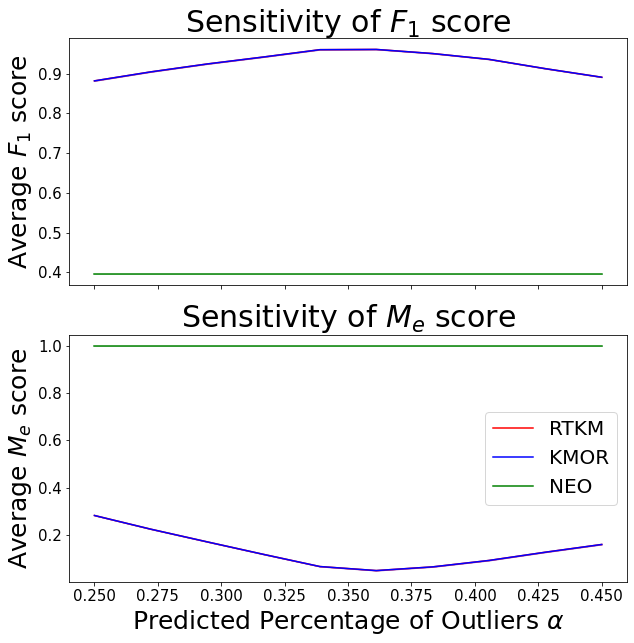

In [6]:
load_figure('wbc')

Make new figure

In [7]:
alpha_vals = np.linspace(.25, .45, 10)

f1_rtkm, f1_kmor, f1_neo, me_avg_rtkm, me_avg_kmor, me_avg_neo, \
min_rtkm, max_rtkm, min_kmor, max_kmor, min_neo, max_neo = sensitivity_to_alpha(data, k=1, kmor_gamma= 1,
                                                      neo_sigma = 0, path_to_neo='/Users/olgadorabiala/Documents/Thesis/RTKM/neo_k_means_vector/neo_kmeans/neo_kmeans.m',
                                                      alpha_vals= alpha_vals, iterations= 50, true_clusters=true_labels,
                                                      membership_option= 'single')
    
    

    _pyeval at line 57 column 30

***** iteration: 1, objective: 49275.258941
***** iteration: 2, objective: 49275.258941
***** No. of iterations done: 2
***** Total no. of data points: 699
***** alpha: 0.000, alphaN: 0
***** beta: 0.250, betaN: 175
    _pyeval at line 57 column 30

***** iteration: 1, objective: 49275.258941
***** iteration: 2, objective: 49275.258941
***** No. of iterations done: 2
***** Total no. of data points: 699
***** alpha: 0.000, alphaN: 0
***** beta: 0.250, betaN: 175
    _pyeval at line 57 column 30

***** iteration: 1, objective: 49275.258941
***** iteration: 2, objective: 49275.258941
***** No. of iterations done: 2
***** Total no. of data points: 699
***** alpha: 0.000, alphaN: 0
***** beta: 0.250, betaN: 175
    _pyeval at line 57 column 30

***** iteration: 1, objective: 49275.258941
***** iteration: 2, objective: 49275.258941
***** No. of iterations done: 2
***** Total no. of data points: 699
***** alpha: 0.000, alphaN: 0
***** beta: 0.250, betaN: 175


***** beta: 0.250, betaN: 175
    _pyeval at line 57 column 30

***** iteration: 1, objective: 49275.258941
***** iteration: 2, objective: 49275.258941
***** No. of iterations done: 2
***** Total no. of data points: 699
***** alpha: 0.000, alphaN: 0
***** beta: 0.250, betaN: 175
    _pyeval at line 57 column 30

***** iteration: 1, objective: 49275.258941
***** iteration: 2, objective: 49275.258941
***** No. of iterations done: 2
***** Total no. of data points: 699
***** alpha: 0.000, alphaN: 0
***** beta: 0.250, betaN: 175
    _pyeval at line 57 column 30

***** iteration: 1, objective: 49275.258941
***** iteration: 2, objective: 49275.258941
***** No. of iterations done: 2
***** Total no. of data points: 699
***** alpha: 0.000, alphaN: 0
***** beta: 0.250, betaN: 175
    _pyeval at line 57 column 30

***** iteration: 1, objective: 49275.258941
***** iteration: 2, objective: 49275.258941
***** No. of iterations done: 2
***** Total no. of data points: 699
***** alpha: 0.000, alphaN: 0


***** alpha: 0.000, alphaN: 0
***** beta: 0.250, betaN: 175
    _pyeval at line 57 column 30

***** iteration: 1, objective: 49275.258941
***** iteration: 2, objective: 49275.258941
***** No. of iterations done: 2
***** Total no. of data points: 699
***** alpha: 0.000, alphaN: 0
***** beta: 0.250, betaN: 175
    _pyeval at line 57 column 30

***** iteration: 1, objective: 49275.258941
***** iteration: 2, objective: 49275.258941
***** No. of iterations done: 2
***** Total no. of data points: 699
***** alpha: 0.000, alphaN: 0
***** beta: 0.250, betaN: 175
    _pyeval at line 57 column 30

***** iteration: 1, objective: 49275.258941
***** iteration: 2, objective: 49275.258941
***** No. of iterations done: 2
***** Total no. of data points: 699
***** alpha: 0.000, alphaN: 0
***** beta: 0.250, betaN: 175
    _pyeval at line 57 column 30

***** iteration: 1, objective: 49275.258941
***** iteration: 2, objective: 49275.258941
***** No. of iterations done: 2
***** Total no. of data points: 699


***** Total no. of data points: 699
***** alpha: 0.000, alphaN: 0
***** beta: 0.272, betaN: 190
    _pyeval at line 57 column 30

***** iteration: 1, objective: 49275.258941
***** iteration: 2, objective: 49275.258941
***** No. of iterations done: 2
***** Total no. of data points: 699
***** alpha: 0.000, alphaN: 0
***** beta: 0.272, betaN: 190
    _pyeval at line 57 column 30

***** iteration: 1, objective: 49275.258941
***** iteration: 2, objective: 49275.258941
***** No. of iterations done: 2
***** Total no. of data points: 699
***** alpha: 0.000, alphaN: 0
***** beta: 0.272, betaN: 190
    _pyeval at line 57 column 30

***** iteration: 1, objective: 49275.258941
***** iteration: 2, objective: 49275.258941
***** No. of iterations done: 2
***** Total no. of data points: 699
***** alpha: 0.000, alphaN: 0
***** beta: 0.272, betaN: 190
    _pyeval at line 57 column 30

***** iteration: 1, objective: 49275.258941
***** iteration: 2, objective: 49275.258941
***** No. of iterations done: 2


***** No. of iterations done: 2
***** Total no. of data points: 699
***** alpha: 0.000, alphaN: 0
***** beta: 0.272, betaN: 190
    _pyeval at line 57 column 30

***** iteration: 1, objective: 49275.258941
***** iteration: 2, objective: 49275.258941
***** No. of iterations done: 2
***** Total no. of data points: 699
***** alpha: 0.000, alphaN: 0
***** beta: 0.272, betaN: 190
    _pyeval at line 57 column 30

***** iteration: 1, objective: 49275.258941
***** iteration: 2, objective: 49275.258941
***** No. of iterations done: 2
***** Total no. of data points: 699
***** alpha: 0.000, alphaN: 0
***** beta: 0.272, betaN: 190
    _pyeval at line 57 column 30

***** iteration: 1, objective: 49275.258941
***** iteration: 2, objective: 49275.258941
***** No. of iterations done: 2
***** Total no. of data points: 699
***** alpha: 0.000, alphaN: 0
***** beta: 0.272, betaN: 190
    _pyeval at line 57 column 30

***** iteration: 1, objective: 49275.258941
***** iteration: 2, objective: 49275.258941


***** No. of iterations done: 2
***** Total no. of data points: 699
***** alpha: 0.000, alphaN: 0
***** beta: 0.294, betaN: 206
    _pyeval at line 57 column 30

***** iteration: 1, objective: 49275.258941
***** iteration: 2, objective: 49275.258941
***** No. of iterations done: 2
***** Total no. of data points: 699
***** alpha: 0.000, alphaN: 0
***** beta: 0.294, betaN: 206
    _pyeval at line 57 column 30

***** iteration: 1, objective: 49275.258941
***** iteration: 2, objective: 49275.258941
***** No. of iterations done: 2
***** Total no. of data points: 699
***** alpha: 0.000, alphaN: 0
***** beta: 0.294, betaN: 206
    _pyeval at line 57 column 30

***** iteration: 1, objective: 49275.258941
***** iteration: 2, objective: 49275.258941
***** No. of iterations done: 2
***** Total no. of data points: 699
***** alpha: 0.000, alphaN: 0
***** beta: 0.294, betaN: 206
    _pyeval at line 57 column 30

***** iteration: 1, objective: 49275.258941
***** iteration: 2, objective: 49275.258941


***** No. of iterations done: 2
***** Total no. of data points: 699
***** alpha: 0.000, alphaN: 0
***** beta: 0.294, betaN: 206
    _pyeval at line 57 column 30

***** iteration: 1, objective: 49275.258941
***** iteration: 2, objective: 49275.258941
***** No. of iterations done: 2
***** Total no. of data points: 699
***** alpha: 0.000, alphaN: 0
***** beta: 0.294, betaN: 206
    _pyeval at line 57 column 30

***** iteration: 1, objective: 49275.258941
***** iteration: 2, objective: 49275.258941
***** No. of iterations done: 2
***** Total no. of data points: 699
***** alpha: 0.000, alphaN: 0
***** beta: 0.294, betaN: 206
    _pyeval at line 57 column 30

***** iteration: 1, objective: 49275.258941
***** iteration: 2, objective: 49275.258941
***** No. of iterations done: 2
***** Total no. of data points: 699
***** alpha: 0.000, alphaN: 0
***** beta: 0.294, betaN: 206
    _pyeval at line 57 column 30

***** iteration: 1, objective: 49275.258941
***** iteration: 2, objective: 49275.258941


***** No. of iterations done: 2
***** Total no. of data points: 699
***** alpha: 0.000, alphaN: 0
***** beta: 0.294, betaN: 206
    _pyeval at line 57 column 30

***** iteration: 1, objective: 49275.258941
***** iteration: 2, objective: 49275.258941
***** No. of iterations done: 2
***** Total no. of data points: 699
***** alpha: 0.000, alphaN: 0
***** beta: 0.294, betaN: 206
    _pyeval at line 57 column 30

***** iteration: 1, objective: 49275.258941
***** iteration: 2, objective: 49275.258941
***** No. of iterations done: 2
***** Total no. of data points: 699
***** alpha: 0.000, alphaN: 0
***** beta: 0.294, betaN: 206
    _pyeval at line 57 column 30

***** iteration: 1, objective: 49275.258941
***** iteration: 2, objective: 49275.258941
***** No. of iterations done: 2
***** Total no. of data points: 699
***** alpha: 0.000, alphaN: 0
***** beta: 0.294, betaN: 206
    _pyeval at line 57 column 30

***** iteration: 1, objective: 49275.258941
***** iteration: 2, objective: 49275.258941


***** No. of iterations done: 2
***** Total no. of data points: 699
***** alpha: 0.000, alphaN: 0
***** beta: 0.317, betaN: 221
    _pyeval at line 57 column 30

***** iteration: 1, objective: 49275.258941
***** iteration: 2, objective: 49275.258941
***** No. of iterations done: 2
***** Total no. of data points: 699
***** alpha: 0.000, alphaN: 0
***** beta: 0.317, betaN: 221
    _pyeval at line 57 column 30

***** iteration: 1, objective: 49275.258941
***** iteration: 2, objective: 49275.258941
***** No. of iterations done: 2
***** Total no. of data points: 699
***** alpha: 0.000, alphaN: 0
***** beta: 0.317, betaN: 221
    _pyeval at line 57 column 30

***** iteration: 1, objective: 49275.258941
***** iteration: 2, objective: 49275.258941
***** No. of iterations done: 2
***** Total no. of data points: 699
***** alpha: 0.000, alphaN: 0
***** beta: 0.317, betaN: 221
    _pyeval at line 57 column 30

***** iteration: 1, objective: 49275.258941
***** iteration: 2, objective: 49275.258941


***** No. of iterations done: 2
***** Total no. of data points: 699
***** alpha: 0.000, alphaN: 0
***** beta: 0.317, betaN: 221
    _pyeval at line 57 column 30

***** iteration: 1, objective: 49275.258941
***** iteration: 2, objective: 49275.258941
***** No. of iterations done: 2
***** Total no. of data points: 699
***** alpha: 0.000, alphaN: 0
***** beta: 0.317, betaN: 221
    _pyeval at line 57 column 30

***** iteration: 1, objective: 49275.258941
***** iteration: 2, objective: 49275.258941
***** No. of iterations done: 2
***** Total no. of data points: 699
***** alpha: 0.000, alphaN: 0
***** beta: 0.317, betaN: 221
    _pyeval at line 57 column 30

***** iteration: 1, objective: 49275.258941
***** iteration: 2, objective: 49275.258941
***** No. of iterations done: 2
***** Total no. of data points: 699
***** alpha: 0.000, alphaN: 0
***** beta: 0.317, betaN: 221
    _pyeval at line 57 column 30

***** iteration: 1, objective: 49275.258941
***** iteration: 2, objective: 49275.258941


***** No. of iterations done: 2
***** Total no. of data points: 699
***** alpha: 0.000, alphaN: 0
***** beta: 0.339, betaN: 237
    _pyeval at line 57 column 30

***** iteration: 1, objective: 49275.258941
***** iteration: 2, objective: 49275.258941
***** No. of iterations done: 2
***** Total no. of data points: 699
***** alpha: 0.000, alphaN: 0
***** beta: 0.339, betaN: 237
    _pyeval at line 57 column 30

***** iteration: 1, objective: 49275.258941
***** iteration: 2, objective: 49275.258941
***** No. of iterations done: 2
***** Total no. of data points: 699
***** alpha: 0.000, alphaN: 0
***** beta: 0.339, betaN: 237
    _pyeval at line 57 column 30

***** iteration: 1, objective: 49275.258941
***** iteration: 2, objective: 49275.258941
***** No. of iterations done: 2
***** Total no. of data points: 699
***** alpha: 0.000, alphaN: 0
***** beta: 0.339, betaN: 237
    _pyeval at line 57 column 30

***** iteration: 1, objective: 49275.258941
***** iteration: 2, objective: 49275.258941


***** No. of iterations done: 2
***** Total no. of data points: 699
***** alpha: 0.000, alphaN: 0
***** beta: 0.339, betaN: 237
    _pyeval at line 57 column 30

***** iteration: 1, objective: 49275.258941
***** iteration: 2, objective: 49275.258941
***** No. of iterations done: 2
***** Total no. of data points: 699
***** alpha: 0.000, alphaN: 0
***** beta: 0.339, betaN: 237
    _pyeval at line 57 column 30

***** iteration: 1, objective: 49275.258941
***** iteration: 2, objective: 49275.258941
***** No. of iterations done: 2
***** Total no. of data points: 699
***** alpha: 0.000, alphaN: 0
***** beta: 0.339, betaN: 237
    _pyeval at line 57 column 30

***** iteration: 1, objective: 49275.258941
***** iteration: 2, objective: 49275.258941
***** No. of iterations done: 2
***** Total no. of data points: 699
***** alpha: 0.000, alphaN: 0
***** beta: 0.339, betaN: 237
    _pyeval at line 57 column 30

***** iteration: 1, objective: 49275.258941
***** iteration: 2, objective: 49275.258941


***** No. of iterations done: 2
***** Total no. of data points: 699
***** alpha: 0.000, alphaN: 0
***** beta: 0.361, betaN: 252
    _pyeval at line 57 column 30

***** iteration: 1, objective: 49275.258941
***** iteration: 2, objective: 49275.258941
***** No. of iterations done: 2
***** Total no. of data points: 699
***** alpha: 0.000, alphaN: 0
***** beta: 0.361, betaN: 252
    _pyeval at line 57 column 30

***** iteration: 1, objective: 49275.258941
***** iteration: 2, objective: 49275.258941
***** No. of iterations done: 2
***** Total no. of data points: 699
***** alpha: 0.000, alphaN: 0
***** beta: 0.361, betaN: 252
    _pyeval at line 57 column 30

***** iteration: 1, objective: 49275.258941
***** iteration: 2, objective: 49275.258941
***** No. of iterations done: 2
***** Total no. of data points: 699
***** alpha: 0.000, alphaN: 0
***** beta: 0.361, betaN: 252
    _pyeval at line 57 column 30

***** iteration: 1, objective: 49275.258941
***** iteration: 2, objective: 49275.258941


***** No. of iterations done: 2
***** Total no. of data points: 699
***** alpha: 0.000, alphaN: 0
***** beta: 0.361, betaN: 252
    _pyeval at line 57 column 30

***** iteration: 1, objective: 49275.258941
***** iteration: 2, objective: 49275.258941
***** No. of iterations done: 2
***** Total no. of data points: 699
***** alpha: 0.000, alphaN: 0
***** beta: 0.361, betaN: 252
    _pyeval at line 57 column 30

***** iteration: 1, objective: 49275.258941
***** iteration: 2, objective: 49275.258941
***** No. of iterations done: 2
***** Total no. of data points: 699
***** alpha: 0.000, alphaN: 0
***** beta: 0.361, betaN: 252
    _pyeval at line 57 column 30

***** iteration: 1, objective: 49275.258941
***** iteration: 2, objective: 49275.258941
***** No. of iterations done: 2
***** Total no. of data points: 699
***** alpha: 0.000, alphaN: 0
***** beta: 0.361, betaN: 252
    _pyeval at line 57 column 30

***** iteration: 1, objective: 49275.258941
***** iteration: 2, objective: 49275.258941


***** No. of iterations done: 2
***** Total no. of data points: 699
***** alpha: 0.000, alphaN: 0
***** beta: 0.361, betaN: 252
    _pyeval at line 57 column 30

***** iteration: 1, objective: 49275.258941
***** iteration: 2, objective: 49275.258941
***** No. of iterations done: 2
***** Total no. of data points: 699
***** alpha: 0.000, alphaN: 0
***** beta: 0.361, betaN: 252
    _pyeval at line 57 column 30

***** iteration: 1, objective: 49275.258941
***** iteration: 2, objective: 49275.258941
***** No. of iterations done: 2
***** Total no. of data points: 699
***** alpha: 0.000, alphaN: 0
***** beta: 0.361, betaN: 252
    _pyeval at line 57 column 30

***** iteration: 1, objective: 49275.258941
***** iteration: 2, objective: 49275.258941
***** No. of iterations done: 2
***** Total no. of data points: 699
***** alpha: 0.000, alphaN: 0
***** beta: 0.361, betaN: 252
    _pyeval at line 57 column 30

***** iteration: 1, objective: 49275.258941
***** iteration: 2, objective: 49275.258941


***** No. of iterations done: 2
***** Total no. of data points: 699
***** alpha: 0.000, alphaN: 0
***** beta: 0.383, betaN: 268
    _pyeval at line 57 column 30

***** iteration: 1, objective: 49275.258941
***** iteration: 2, objective: 49275.258941
***** No. of iterations done: 2
***** Total no. of data points: 699
***** alpha: 0.000, alphaN: 0
***** beta: 0.383, betaN: 268
    _pyeval at line 57 column 30

***** iteration: 1, objective: 49275.258941
***** iteration: 2, objective: 49275.258941
***** No. of iterations done: 2
***** Total no. of data points: 699
***** alpha: 0.000, alphaN: 0
***** beta: 0.383, betaN: 268
    _pyeval at line 57 column 30

***** iteration: 1, objective: 49275.258941
***** iteration: 2, objective: 49275.258941
***** No. of iterations done: 2
***** Total no. of data points: 699
***** alpha: 0.000, alphaN: 0
***** beta: 0.383, betaN: 268
    _pyeval at line 57 column 30

***** iteration: 1, objective: 49275.258941
***** iteration: 2, objective: 49275.258941


***** No. of iterations done: 2
***** Total no. of data points: 699
***** alpha: 0.000, alphaN: 0
***** beta: 0.383, betaN: 268
    _pyeval at line 57 column 30

***** iteration: 1, objective: 49275.258941
***** iteration: 2, objective: 49275.258941
***** No. of iterations done: 2
***** Total no. of data points: 699
***** alpha: 0.000, alphaN: 0
***** beta: 0.383, betaN: 268
    _pyeval at line 57 column 30

***** iteration: 1, objective: 49275.258941
***** iteration: 2, objective: 49275.258941
***** No. of iterations done: 2
***** Total no. of data points: 699
***** alpha: 0.000, alphaN: 0
***** beta: 0.383, betaN: 268
    _pyeval at line 57 column 30

***** iteration: 1, objective: 49275.258941
***** iteration: 2, objective: 49275.258941
***** No. of iterations done: 2
***** Total no. of data points: 699
***** alpha: 0.000, alphaN: 0
***** beta: 0.383, betaN: 268
    _pyeval at line 57 column 30

***** iteration: 1, objective: 49275.258941
***** iteration: 2, objective: 49275.258941


***** No. of iterations done: 2
***** Total no. of data points: 699
***** alpha: 0.000, alphaN: 0
***** beta: 0.406, betaN: 283
    _pyeval at line 57 column 30

***** iteration: 1, objective: 49275.258941
***** iteration: 2, objective: 49275.258941
***** No. of iterations done: 2
***** Total no. of data points: 699
***** alpha: 0.000, alphaN: 0
***** beta: 0.406, betaN: 283
    _pyeval at line 57 column 30

***** iteration: 1, objective: 49275.258941
***** iteration: 2, objective: 49275.258941
***** No. of iterations done: 2
***** Total no. of data points: 699
***** alpha: 0.000, alphaN: 0
***** beta: 0.406, betaN: 283
    _pyeval at line 57 column 30

***** iteration: 1, objective: 49275.258941
***** iteration: 2, objective: 49275.258941
***** No. of iterations done: 2
***** Total no. of data points: 699
***** alpha: 0.000, alphaN: 0
***** beta: 0.406, betaN: 283
    _pyeval at line 57 column 30

***** iteration: 1, objective: 49275.258941
***** iteration: 2, objective: 49275.258941


***** No. of iterations done: 2
***** Total no. of data points: 699
***** alpha: 0.000, alphaN: 0
***** beta: 0.406, betaN: 283
    _pyeval at line 57 column 30

***** iteration: 1, objective: 49275.258941
***** iteration: 2, objective: 49275.258941
***** No. of iterations done: 2
***** Total no. of data points: 699
***** alpha: 0.000, alphaN: 0
***** beta: 0.406, betaN: 283
    _pyeval at line 57 column 30

***** iteration: 1, objective: 49275.258941
***** iteration: 2, objective: 49275.258941
***** No. of iterations done: 2
***** Total no. of data points: 699
***** alpha: 0.000, alphaN: 0
***** beta: 0.406, betaN: 283
    _pyeval at line 57 column 30

***** iteration: 1, objective: 49275.258941
***** iteration: 2, objective: 49275.258941
***** No. of iterations done: 2
***** Total no. of data points: 699
***** alpha: 0.000, alphaN: 0
***** beta: 0.406, betaN: 283
    _pyeval at line 57 column 30

***** iteration: 1, objective: 49275.258941
***** iteration: 2, objective: 49275.258941


***** No. of iterations done: 2
***** Total no. of data points: 699
***** alpha: 0.000, alphaN: 0
***** beta: 0.406, betaN: 283
    _pyeval at line 57 column 30

***** iteration: 1, objective: 49275.258941
***** iteration: 2, objective: 49275.258941
***** No. of iterations done: 2
***** Total no. of data points: 699
***** alpha: 0.000, alphaN: 0
***** beta: 0.406, betaN: 283
    _pyeval at line 57 column 30

***** iteration: 1, objective: 49275.258941
***** iteration: 2, objective: 49275.258941
***** No. of iterations done: 2
***** Total no. of data points: 699
***** alpha: 0.000, alphaN: 0
***** beta: 0.428, betaN: 299
    _pyeval at line 57 column 30

***** iteration: 1, objective: 49275.258941
***** iteration: 2, objective: 49275.258941
***** No. of iterations done: 2
***** Total no. of data points: 699
***** alpha: 0.000, alphaN: 0
***** beta: 0.428, betaN: 299
    _pyeval at line 57 column 30

***** iteration: 1, objective: 49275.258941
***** iteration: 2, objective: 49275.258941


***** iteration: 2, objective: 49275.258941
***** No. of iterations done: 2
***** Total no. of data points: 699
***** alpha: 0.000, alphaN: 0
***** beta: 0.428, betaN: 299
    _pyeval at line 57 column 30

***** iteration: 1, objective: 49275.258941
***** iteration: 2, objective: 49275.258941
***** No. of iterations done: 2
***** Total no. of data points: 699
***** alpha: 0.000, alphaN: 0
***** beta: 0.428, betaN: 299
    _pyeval at line 57 column 30

***** iteration: 1, objective: 49275.258941
***** iteration: 2, objective: 49275.258941
***** No. of iterations done: 2
***** Total no. of data points: 699
***** alpha: 0.000, alphaN: 0
***** beta: 0.428, betaN: 299
    _pyeval at line 57 column 30

***** iteration: 1, objective: 49275.258941
***** iteration: 2, objective: 49275.258941
***** No. of iterations done: 2
***** Total no. of data points: 699
***** alpha: 0.000, alphaN: 0
***** beta: 0.428, betaN: 299
    _pyeval at line 57 column 30

***** iteration: 1, objective: 49275.258941


***** iteration: 2, objective: 49275.258941
***** No. of iterations done: 2
***** Total no. of data points: 699
***** alpha: 0.000, alphaN: 0
***** beta: 0.428, betaN: 299
    _pyeval at line 57 column 30

***** iteration: 1, objective: 49275.258941
***** iteration: 2, objective: 49275.258941
***** No. of iterations done: 2
***** Total no. of data points: 699
***** alpha: 0.000, alphaN: 0
***** beta: 0.428, betaN: 299
    _pyeval at line 57 column 30

***** iteration: 1, objective: 49275.258941
***** iteration: 2, objective: 49275.258941
***** No. of iterations done: 2
***** Total no. of data points: 699
***** alpha: 0.000, alphaN: 0
***** beta: 0.428, betaN: 299
    _pyeval at line 57 column 30

***** iteration: 1, objective: 49275.258941
***** iteration: 2, objective: 49275.258941
***** No. of iterations done: 2
***** Total no. of data points: 699
***** alpha: 0.000, alphaN: 0
***** beta: 0.428, betaN: 299
    _pyeval at line 57 column 30

***** iteration: 1, objective: 49275.258941


***** iteration: 2, objective: 49275.258941
***** No. of iterations done: 2
***** Total no. of data points: 699
***** alpha: 0.000, alphaN: 0
***** beta: 0.450, betaN: 315
    _pyeval at line 57 column 30

***** iteration: 1, objective: 49275.258941
***** iteration: 2, objective: 49275.258941
***** No. of iterations done: 2
***** Total no. of data points: 699
***** alpha: 0.000, alphaN: 0
***** beta: 0.450, betaN: 315
    _pyeval at line 57 column 30

***** iteration: 1, objective: 49275.258941
***** iteration: 2, objective: 49275.258941
***** No. of iterations done: 2
***** Total no. of data points: 699
***** alpha: 0.000, alphaN: 0
***** beta: 0.450, betaN: 315
    _pyeval at line 57 column 30

***** iteration: 1, objective: 49275.258941
***** iteration: 2, objective: 49275.258941
***** No. of iterations done: 2
***** Total no. of data points: 699
***** alpha: 0.000, alphaN: 0
***** beta: 0.450, betaN: 315
    _pyeval at line 57 column 30

***** iteration: 1, objective: 49275.258941


***** iteration: 2, objective: 49275.258941
***** No. of iterations done: 2
***** Total no. of data points: 699
***** alpha: 0.000, alphaN: 0
***** beta: 0.450, betaN: 315
    _pyeval at line 57 column 30

***** iteration: 1, objective: 49275.258941
***** iteration: 2, objective: 49275.258941
***** No. of iterations done: 2
***** Total no. of data points: 699
***** alpha: 0.000, alphaN: 0
***** beta: 0.450, betaN: 315
    _pyeval at line 57 column 30

***** iteration: 1, objective: 49275.258941
***** iteration: 2, objective: 49275.258941
***** No. of iterations done: 2
***** Total no. of data points: 699
***** alpha: 0.000, alphaN: 0
***** beta: 0.450, betaN: 315
    _pyeval at line 57 column 30

***** iteration: 1, objective: 49275.258941
***** iteration: 2, objective: 49275.258941
***** No. of iterations done: 2
***** Total no. of data points: 699
***** alpha: 0.000, alphaN: 0
***** beta: 0.450, betaN: 315
    _pyeval at line 57 column 30

***** iteration: 1, objective: 49275.258941


In [ ]:
make_figure(dataset = 'new_wbc', f1_rtkm= f1_rtkm, f1_kmor = f1_kmor, f1_neo = f1_neo, me_rtkm = me_rtkm,
            me_kmor = me_kmor, me_neo = me_neo, min_rtkm = min_rtkm, max_rtkm = max_rtkm, min_kmor = min_kmor, 
            max_kmor = max_kmor, min_neo = min_neo, max_neo = max_neo, alpha_vals = alpha_vals)

# Shuttle Dataset

In [12]:
shuttle = pd.read_csv('datasets/shuttle.trn', 
                      names = ['feature 1', 'feature 2', 'feature 3', 'feature 4', 'feature 5', 'feature 6', 'feature 7', 'feature 8', 'feature 9', 'class'],
                     delimiter = ' ')

data = shuttle[['feature 1', 'feature 2', 'feature 3', 'feature 4', 'feature 5', 'feature 6', 'feature 7', 'feature 8', 'feature 9', 'class']].to_numpy().astype(float)
label = shuttle['class'].to_numpy().astype(int)


In [13]:
data = data.T
m,n = data.shape

In [16]:
temp_label = np.zeros(len(label))
np.copyto(temp_label, label[:])
unique_vals = np.unique(temp_label)

val = []
counts = []
for i in range(len(unique_vals)):
    counts.append(len(np.where(temp_label == unique_vals[i])[0]))
    val.append(counts[i]/len(temp_label))
print('percentage of points in cluster', val)
print('percent in top 3 clusters', val[0] + val[4] + val[3])
print('number of points in each cluster', counts)
print('number of outliers', counts[1] + counts[2] + counts[5] + counts[6])

true_outliers = np.zeros(1)
for i in [2,3,6,7]:
    true_outliers = np.hstack((true_outliers, np.where(temp_label==i)[0]))
true_outliers = (true_outliers[1:]).astype(int)

temp_label[true_outliers] = 6

k = 3

new_val = 0
true_label_vec = np.zeros(n)
for val in np.unique(temp_label):
    true_label_vec = np.where(temp_label == val, new_val, true_label_vec)
    new_val +=1
    
true_label = np.zeros((k+1, n))
true_label[true_label_vec.astype(int), np.arange(n)] = 1


percentage of points in cluster [0.7840919540229885, 0.0008505747126436781, 0.0030344827586206895, 0.1551264367816092, 0.05650574712643678, 0.00013793103448275863, 0.0002528735632183908]
percent in top 3 clusters 0.9957241379310344
number of points in each cluster [34108, 37, 132, 6748, 2458, 6, 11]
number of outliers 186


# Run RTKM

In [14]:
RTKM_shuttle = RTKM(data)
RTKM_shuttle.perform_clustering(k=3, percent_outliers = 0.05, max_iter = 500)

tp, fp, tn, fn, f1_scores, me = accuracy_measures(true_clusters = true_label, pred_clusters = RTKM_shuttle.weights, pred_outliers = RTKM_shuttle.outliers, membership_option = 'single')

print('\n\n Number of true positives: ', tp, '\n\n Number of false positives : ', fp, 
      '\n\n Number of true negatives: ', tn, '\n\n Number of false negatives: ', fn, 
      '\n\n F1 scores for each cluster: ', f1_scores, '\n\n Average F1 score: ', np.average(f1_scores),
     '\n\n me score: ', me)




 Number of true positives:  [25493, 2935, 0, 118] 

 Number of false positives :  [2900, 1379, 8548, 2127] 

 Number of true negatives:  [6492, 35373, 32494, 41187] 

 Number of false negatives:  [8615, 3813, 2458, 68] 

 F1 scores for each cluster:  [0.81576295 0.53064545 0.         0.09707939] 

 Average F1 score:  0.3608719479729249 

 me score:  0.3688746683157037


# Run KMOR

In [15]:
pred_labels_KMOR, pred_outliers_KMOR = run_kmor(data, k=3, percent_outliers= 0.05, gamma = 1)

tp, fp, tn, fn, f1_scores, me = accuracy_measures(true_clusters = true_label, pred_clusters = pred_labels_KMOR, pred_outliers = pred_outliers_KMOR, membership_option = 'single')

print('\n\n Number of true positives: ', tp, '\n\n Number of false positives : ', fp, 
      '\n\n Number of true negatives: ', tn, '\n\n Number of false negatives: ', fn, 
      '\n\n F1 scores for each cluster: ', f1_scores, '\n\n Average F1 score: ', np.average(f1_scores),
     '\n\n me score:', me)



 Number of true positives:  [25571, 2926, 0, 122] 

 Number of false positives :  [2943, 1346, 8539, 2053] 

 Number of true negatives:  [6449, 35406, 32503, 41261] 

 Number of false negatives:  [8537, 3822, 2458, 64] 

 F1 scores for each cluster:  [0.81667784 0.53103448 0.         0.10334604] 

 Average F1 score:  0.3627645918547795 

 me score: 0.347335237524805


# Run NEO

In [16]:
pred_labels_NEO, pred_outliers_NEO = run_neo(data, path_to_neo='/Users/olgadorabiala/Documents/Thesis/RTKM/neo_k_means_vector/neo_kmeans/neo_kmeans.m'
        , k=3, percent_outliers=0.05, sigma = 0, init_centers = None)

tp, fp, tn, fn, f1_scores, me = accuracy_measures(true_clusters = true_label, pred_clusters = pred_labels_NEO, pred_outliers = pred_outliers_NEO, membership_option = 'single')


print('\n\n Number of true positives: ', tp, '\n\n Number of false positives : ', fp, 
      '\n\n Number of true negatives: ', tn, '\n\n Number of false negatives: ', fn, 
      '\n\n F1 scores for each cluster: ', f1_scores, '\n\n Average F1 score: ', np.average(f1_scores), 
     '\n\n me score: ', me)

    _pyeval at line 57 column 30

***** iteration: 1, objective: 30972509.948587
***** iteration: 2, objective: 27735268.162740
***** iteration: 3, objective: 26538805.230366
***** iteration: 4, objective: 25964519.011515
***** iteration: 5, objective: 25595649.042002
***** iteration: 6, objective: 25324090.266117
***** iteration: 7, objective: 25140531.870798
***** iteration: 8, objective: 24964461.691793
***** iteration: 9, objective: 24828377.916666
***** iteration: 10, objective: 24711269.573639
***** iteration: 11, objective: 24658292.286641
***** iteration: 12, objective: 24633707.950181
***** iteration: 13, objective: 24601680.682593
***** iteration: 14, objective: 24593676.402869
***** iteration: 15, objective: 24592271.482567
***** iteration: 16, objective: 24591998.296786
***** iteration: 17, objective: 24591884.079082
***** iteration: 18, objective: 24591824.158127
***** iteration: 19, objective: 24591801.646919
***** iteration: 20, objective: 24591796.260321
***** iteration

# Test Sensitivity to alpha 

Included are the metrics obtained from the paper. 

Load figure data from paper.

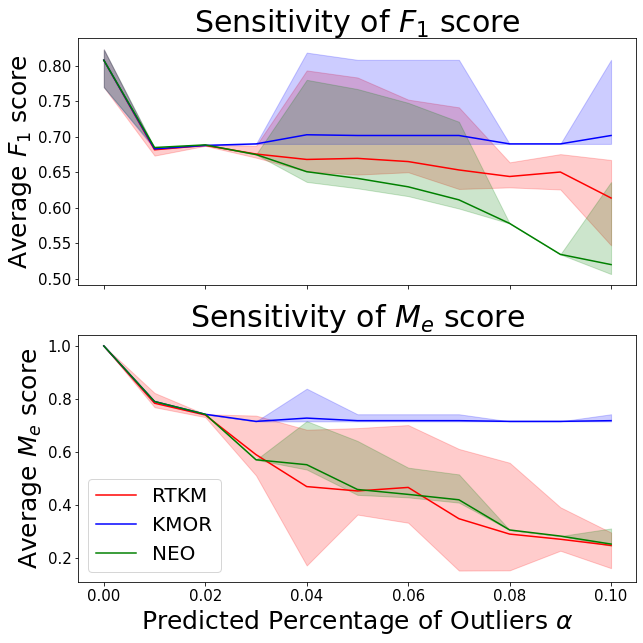

In [5]:
load_figure('shuttle')

Generate new plots. 

In [13]:
alpha_vals = np.linspace(0, 0.10, 11)

f1_rtkm, f1_kmor, f1_neo, me_rtkm, me_kmor, me_neo, \
min_rtkm, max_rtkm, min_kmor, max_kmor, min_neo, max_neo, \
f1_scores_rtkm, f1_scores_kmor, f1_scores_neo, me_scores_rtkm, \
me_scores_kmor, me_scores_neo = sensitivity_to_alpha(data, k=3, kmor_gamma= 9,
                                                     neo_sigma = 0, path_to_neo='/Users/olgadorabiala/Documents/ThesisResearch/PALM/neo_k_means_vector/neo_kmeans/neo_kmeans.m',
                                                                                alpha_vals= alpha_vals, iterations= 50, true_clusters=true_label,
                                                                                membership_option= 'single')
    

    _pyeval at line 57 column 30

    _pyeval at line 32 column 9

***** iteration: 1, objective: 1295276665.013702
***** iteration: 2, objective: 1295276665.013702
***** No. of iterations done: 2
***** Total no. of data points: 43500
***** alpha: 0.000, alphaN: 0
***** beta: 0.000, betaN: 0
    _pyeval at line 57 column 30

    _pyeval at line 32 column 9

***** iteration: 1, objective: 1295274756.027964
***** iteration: 2, objective: 1295274756.027964
***** No. of iterations done: 2
***** Total no. of data points: 43500
***** alpha: 0.000, alphaN: 0
***** beta: 0.000, betaN: 0
    _pyeval at line 57 column 30

    _pyeval at line 32 column 9

***** iteration: 1, objective: 1137682899.870681
***** iteration: 2, objective: 1137682899.870681
***** No. of iterations done: 2
***** Total no. of data points: 43500
***** alpha: 0.000, alphaN: 0
***** beta: 0.000, betaN: 0
    _pyeval at line 57 column 30

    _pyeval at line 32 column 9

***** iteration: 1, objective: 1662448310.299665
*****

***** iteration: 2, objective: 1763300281.554463
***** No. of iterations done: 2
***** Total no. of data points: 43500
***** alpha: 0.000, alphaN: 0
***** beta: 0.000, betaN: 0
    _pyeval at line 57 column 30

    _pyeval at line 32 column 9

***** iteration: 1, objective: 1763481612.483495
***** iteration: 2, objective: 1763481612.483495
***** No. of iterations done: 2
***** Total no. of data points: 43500
***** alpha: 0.000, alphaN: 0
***** beta: 0.000, betaN: 0
    _pyeval at line 57 column 30

    _pyeval at line 32 column 9

***** iteration: 1, objective: 1763929671.736768
***** iteration: 2, objective: 1763929671.736768
***** No. of iterations done: 2
***** Total no. of data points: 43500
***** alpha: 0.000, alphaN: 0
***** beta: 0.000, betaN: 0
    _pyeval at line 57 column 30

    _pyeval at line 32 column 9

***** iteration: 1, objective: 1763261177.306664
***** iteration: 2, objective: 1763261177.306664
***** No. of iterations done: 2
***** Total no. of data points: 43500
**

    _pyeval at line 32 column 9

***** iteration: 1, objective: 1763300281.554463
***** iteration: 2, objective: 1763300281.554463
***** No. of iterations done: 2
***** Total no. of data points: 43500
***** alpha: 0.000, alphaN: 0
***** beta: 0.000, betaN: 0
    _pyeval at line 57 column 30

    _pyeval at line 32 column 9

***** iteration: 1, objective: 1295268240.649860
***** iteration: 2, objective: 1295268240.649860
***** No. of iterations done: 2
***** Total no. of data points: 43500
***** alpha: 0.000, alphaN: 0
***** beta: 0.000, betaN: 0
Iteration 100
    _pyeval at line 57 column 30

    _pyeval at line 32 column 9

***** iteration: 1, objective: 1764810629.866803
***** iteration: 2, objective: 1764810629.866803
***** No. of iterations done: 2
***** Total no. of data points: 43500
***** alpha: 0.000, alphaN: 0
***** beta: 0.000, betaN: 0
    _pyeval at line 57 column 30

    _pyeval at line 32 column 9

***** iteration: 1, objective: 1295268240.649860
***** iteration: 2, objec

    _pyeval at line 57 column 30

    _pyeval at line 32 column 9

***** iteration: 1, objective: 1295276665.013702
***** iteration: 2, objective: 1295276665.013702
***** No. of iterations done: 2
***** Total no. of data points: 43500
***** alpha: 0.000, alphaN: 0
***** beta: 0.000, betaN: 0
    _pyeval at line 57 column 30

    _pyeval at line 32 column 9

***** iteration: 1, objective: 1763261162.334967
***** iteration: 2, objective: 1763261162.334967
***** No. of iterations done: 2
***** Total no. of data points: 43500
***** alpha: 0.000, alphaN: 0
***** beta: 0.000, betaN: 0
    _pyeval at line 57 column 30

    _pyeval at line 32 column 9

***** iteration: 1, objective: 1295445379.803411
***** iteration: 2, objective: 1295445379.803411
***** No. of iterations done: 2
***** Total no. of data points: 43500
***** alpha: 0.000, alphaN: 0
***** beta: 0.000, betaN: 0
    _pyeval at line 57 column 30

    _pyeval at line 32 column 9

***** iteration: 1, objective: 1137542112.673764
*****

***** iteration: 7, objective: 28043346.579046
***** iteration: 8, objective: 28043332.293263
***** iteration: 9, objective: 28043329.791599
***** iteration: 10, objective: 28043329.791599
***** No. of iterations done: 10
***** Total no. of data points: 43500
***** alpha: 0.000, alphaN: 0
***** beta: 0.025, betaN: 1088
Iteration 100
Iteration 200
Iteration 300
Iteration 400
Iteration 500
Iteration 600
Iteration 700
Iteration 800
Iteration 900
Iteration 1000
PALM reached maximum number of iterations
    _pyeval at line 57 column 30

    _pyeval at line 32 column 9

***** iteration: 1, objective: 29101760.447253
***** iteration: 2, objective: 28049298.176704
***** iteration: 3, objective: 28044480.259579
***** iteration: 4, objective: 28043704.878985
***** iteration: 5, objective: 28043443.510051
***** iteration: 6, objective: 28043362.941667
***** iteration: 7, objective: 28043346.579046
***** iteration: 8, objective: 28043332.293263
***** iteration: 9, objective: 28043329.791599
***** 

***** alpha: 0.000, alphaN: 0
***** beta: 0.025, betaN: 1088
Iteration 100
Iteration 200
Iteration 300
Iteration 400
Iteration 500
Iteration 600
Iteration 700
Iteration 800
Iteration 900
Iteration 1000
PALM reached maximum number of iterations
    _pyeval at line 57 column 30

    _pyeval at line 32 column 9

***** iteration: 1, objective: 29102731.940855
***** iteration: 2, objective: 28049626.291955
***** iteration: 3, objective: 28044562.675570
***** iteration: 4, objective: 28043757.819453
***** iteration: 5, objective: 28043443.510051
***** iteration: 6, objective: 28043362.941667
***** iteration: 7, objective: 28043346.579046
***** iteration: 8, objective: 28043332.293263
***** iteration: 9, objective: 28043329.791599
***** iteration: 10, objective: 28043329.791599
***** No. of iterations done: 10
***** Total no. of data points: 43500
***** alpha: 0.000, alphaN: 0
***** beta: 0.025, betaN: 1088
Iteration 100
Iteration 200
Iteration 300
Iteration 400
Iteration 500
Iteration 600
It

    _pyeval at line 32 column 9

***** iteration: 1, objective: 29328484.593136
***** iteration: 2, objective: 28049429.662064
***** iteration: 3, objective: 28044287.909178
***** iteration: 4, objective: 28043570.331423
***** iteration: 5, objective: 28043381.791500
***** iteration: 6, objective: 28043349.237876
***** iteration: 7, objective: 28043333.446008
***** iteration: 8, objective: 28043329.909709
***** iteration: 9, objective: 28043329.791599
***** iteration: 10, objective: 28043329.791599
***** No. of iterations done: 10
***** Total no. of data points: 43500
***** alpha: 0.000, alphaN: 0
***** beta: 0.025, betaN: 1088
Iteration 100
Iteration 200
Iteration 300
Iteration 400
Iteration 500
Iteration 600
Iteration 700
Iteration 800
Iteration 900
Iteration 1000
PALM reached maximum number of iterations
    _pyeval at line 57 column 30

    _pyeval at line 32 column 9

***** iteration: 1, objective: 29100096.870925
***** iteration: 2, objective: 28049141.764312
***** iteration: 3, 

***** alpha: 0.000, alphaN: 0
***** beta: 0.025, betaN: 1088
    _pyeval at line 57 column 30

    _pyeval at line 32 column 9

***** iteration: 1, objective: 29110985.187209
***** iteration: 2, objective: 28051209.509557
***** iteration: 3, objective: 28045214.701221
***** iteration: 4, objective: 28044026.158732
***** iteration: 5, objective: 28043511.704794
***** iteration: 6, objective: 28043372.069887
***** iteration: 7, objective: 28043348.049576
***** iteration: 8, objective: 28043332.293263
***** iteration: 9, objective: 28043329.791599
***** iteration: 10, objective: 28043329.791599
***** No. of iterations done: 10
***** Total no. of data points: 43500
***** alpha: 0.000, alphaN: 0
***** beta: 0.025, betaN: 1088
    _pyeval at line 57 column 30

    _pyeval at line 32 column 9

***** iteration: 1, objective: 29101752.569806
***** iteration: 2, objective: 28049317.738047
***** iteration: 3, objective: 28044487.614449
***** iteration: 4, objective: 28043715.699743
***** iteratio

***** iteration: 5, objective: 28043443.510051
***** iteration: 6, objective: 28043362.941667
***** iteration: 7, objective: 28043346.579046
***** iteration: 8, objective: 28043332.293263
***** iteration: 9, objective: 28043329.791599
***** iteration: 10, objective: 28043329.791599
***** No. of iterations done: 10
***** Total no. of data points: 43500
***** alpha: 0.000, alphaN: 0
***** beta: 0.025, betaN: 1088
    _pyeval at line 57 column 30

    _pyeval at line 32 column 9

***** iteration: 1, objective: 29344716.158706
***** iteration: 2, objective: 28052051.731639
***** iteration: 3, objective: 28045231.872348
***** iteration: 4, objective: 28044049.357220
***** iteration: 5, objective: 28043519.970411
***** iteration: 6, objective: 28043375.081458
***** iteration: 7, objective: 28043349.237876
***** iteration: 8, objective: 28043333.446008
***** iteration: 9, objective: 28043329.909709
***** iteration: 10, objective: 28043329.791599
***** iteration: 11, objective: 28043329.791599


***** iteration: 1, objective: 29110985.187209
***** iteration: 2, objective: 28051209.509557
***** iteration: 3, objective: 28045214.701221
***** iteration: 4, objective: 28044026.158732
***** iteration: 5, objective: 28043511.704794
***** iteration: 6, objective: 28043372.069887
***** iteration: 7, objective: 28043348.049576
***** iteration: 8, objective: 28043332.293263
***** iteration: 9, objective: 28043329.791599
***** iteration: 10, objective: 28043329.791599
***** No. of iterations done: 10
***** Total no. of data points: 43500
***** alpha: 0.000, alphaN: 0
***** beta: 0.025, betaN: 1088
    _pyeval at line 57 column 30

    _pyeval at line 32 column 9

***** iteration: 1, objective: 38405601.338211
***** iteration: 2, objective: 35639857.979022
***** iteration: 3, objective: 35495430.633827
***** iteration: 4, objective: 35454615.880915
***** iteration: 5, objective: 35437395.708409
***** iteration: 6, objective: 35430476.960363
***** iteration: 7, objective: 35429443.756447


    _pyeval at line 57 column 30

    _pyeval at line 32 column 9

***** iteration: 1, objective: 29101752.569806
***** iteration: 2, objective: 28049317.738047
***** iteration: 3, objective: 28044487.614449
***** iteration: 4, objective: 28043715.699743
***** iteration: 5, objective: 28043443.510051
***** iteration: 6, objective: 28043362.941667
***** iteration: 7, objective: 28043346.579046
***** iteration: 8, objective: 28043332.293263
***** iteration: 9, objective: 28043329.791599
***** iteration: 10, objective: 28043329.791599
***** No. of iterations done: 10
***** Total no. of data points: 43500
***** alpha: 0.000, alphaN: 0
***** beta: 0.025, betaN: 1088
    _pyeval at line 57 column 30

    _pyeval at line 32 column 9

***** iteration: 1, objective: 29101752.569806
***** iteration: 2, objective: 28049317.738047
***** iteration: 3, objective: 28044487.614449
***** iteration: 4, objective: 28043715.699743
***** iteration: 5, objective: 28043443.510051
***** iteration: 6, objectiv

***** iteration: 10, objective: 24595635.638741
***** iteration: 11, objective: 24592602.165796
***** iteration: 12, objective: 24592036.500266
***** iteration: 13, objective: 24591941.346566
***** iteration: 14, objective: 24591912.649094
***** iteration: 15, objective: 24591904.920581
***** iteration: 16, objective: 24591899.855728
***** iteration: 17, objective: 24591897.245962
***** iteration: 18, objective: 24591893.458989
***** iteration: 19, objective: 24591884.336992
***** iteration: 20, objective: 24591848.939977
***** iteration: 21, objective: 24591811.140643
***** iteration: 22, objective: 24591795.040601
***** iteration: 23, objective: 24591793.706623
***** iteration: 24, objective: 24591793.053798
***** iteration: 25, objective: 24591792.864540
***** iteration: 26, objective: 24591792.786150
***** iteration: 27, objective: 24591792.786150
***** No. of iterations done: 27
***** Total no. of data points: 43500
***** alpha: 0.000, alphaN: 0
***** beta: 0.050, betaN: 2175
    

***** No. of iterations done: 27
***** Total no. of data points: 43500
***** alpha: 0.000, alphaN: 0
***** beta: 0.050, betaN: 2175


/Users/olgadorabiala/Documents/Thesis/RTKM/KMOR.py:52: RuntimeWarning: invalid value encountered in true_divide
  Z = (Umat[inliers,:k]).T@Data[inliers,:]/denom[:, np.newaxis]


    _pyeval at line 57 column 30

    _pyeval at line 32 column 9

***** iteration: 1, objective: 38006387.973276
***** iteration: 2, objective: 35672726.092974
***** iteration: 3, objective: 35165992.857458
***** iteration: 4, objective: 35016390.040556
***** iteration: 5, objective: 34969269.886201
***** iteration: 6, objective: 34946046.866763
***** iteration: 7, objective: 34937953.238916
***** iteration: 8, objective: 34937170.079418
***** iteration: 9, objective: 34937138.244665
***** iteration: 10, objective: 34937137.051168
***** iteration: 11, objective: 34937136.785956
***** iteration: 12, objective: 34937136.785956
***** No. of iterations done: 12
***** Total no. of data points: 43500
***** alpha: 0.000, alphaN: 0
***** beta: 0.050, betaN: 2175
Iteration 100
Iteration 200
Iteration 300
Iteration 400
Iteration 500
Iteration 600
Iteration 700
Iteration 800
Iteration 900
Iteration 1000
PALM reached maximum number of iterations
    _pyeval at line 57 column 30

    _pyeval at li

***** iteration: 19, objective: 24591884.336992
***** iteration: 20, objective: 24591848.939977
***** iteration: 21, objective: 24591811.140643
***** iteration: 22, objective: 24591795.040601
***** iteration: 23, objective: 24591793.706623
***** iteration: 24, objective: 24591793.053798
***** iteration: 25, objective: 24591792.864540
***** iteration: 26, objective: 24591792.786150
***** iteration: 27, objective: 24591792.786150
***** No. of iterations done: 27
***** Total no. of data points: 43500
***** alpha: 0.000, alphaN: 0
***** beta: 0.050, betaN: 2175
    _pyeval at line 57 column 30

    _pyeval at line 32 column 9

***** iteration: 1, objective: 26198491.578056
***** iteration: 2, objective: 24888253.941971
***** iteration: 3, objective: 24807352.288784
***** iteration: 4, objective: 24718981.314776
***** iteration: 5, objective: 24669270.155290
***** iteration: 6, objective: 24632920.633720
***** iteration: 7, objective: 24611241.837812
***** iteration: 8, objective: 24607345.

***** iteration: 17, objective: 24591897.245962
***** iteration: 18, objective: 24591893.458989
***** iteration: 19, objective: 24591884.336992
***** iteration: 20, objective: 24591848.939977
***** iteration: 21, objective: 24591811.140643
***** iteration: 22, objective: 24591795.040601
***** iteration: 23, objective: 24591793.706623
***** iteration: 24, objective: 24591793.053798
***** iteration: 25, objective: 24591792.864540
***** iteration: 26, objective: 24591792.786150
***** iteration: 27, objective: 24591792.786150
***** No. of iterations done: 27
***** Total no. of data points: 43500
***** alpha: 0.000, alphaN: 0
***** beta: 0.050, betaN: 2175
Iteration 100
Iteration 200
Iteration 300
Iteration 400
Iteration 500
Iteration 600
Iteration 700
Iteration 800
Iteration 900
Iteration 1000
PALM reached maximum number of iterations
    _pyeval at line 57 column 30

    _pyeval at line 32 column 9

***** iteration: 1, objective: 36434568.729693
***** iteration: 2, objective: 32452552.554

***** iteration: 12, objective: 24592039.392457
***** iteration: 13, objective: 24591941.346566
***** iteration: 14, objective: 24591912.649094
***** iteration: 15, objective: 24591904.920581
***** iteration: 16, objective: 24591899.855728
***** iteration: 17, objective: 24591897.245962
***** iteration: 18, objective: 24591893.458989
***** iteration: 19, objective: 24591884.336992
***** iteration: 20, objective: 24591848.939977
***** iteration: 21, objective: 24591811.140643
***** iteration: 22, objective: 24591795.040601
***** iteration: 23, objective: 24591793.706623
***** iteration: 24, objective: 24591793.053798
***** iteration: 25, objective: 24591792.864540
***** iteration: 26, objective: 24591792.786150
***** iteration: 27, objective: 24591792.786150
***** No. of iterations done: 27
***** Total no. of data points: 43500
***** alpha: 0.000, alphaN: 0
***** beta: 0.050, betaN: 2175
    _pyeval at line 57 column 30

    _pyeval at line 32 column 9

***** iteration: 1, objective: 26

    _pyeval at line 57 column 30

    _pyeval at line 32 column 9

***** iteration: 1, objective: 26198491.578056
***** iteration: 2, objective: 24888253.941971
***** iteration: 3, objective: 24807352.288784
***** iteration: 4, objective: 24718981.314776
***** iteration: 5, objective: 24669270.155290
***** iteration: 6, objective: 24632920.633720
***** iteration: 7, objective: 24611241.837812
***** iteration: 8, objective: 24607345.290180
***** iteration: 9, objective: 24603332.680991
***** iteration: 10, objective: 24595635.638741
***** iteration: 11, objective: 24592602.165796
***** iteration: 12, objective: 24592036.500266
***** iteration: 13, objective: 24591941.346566
***** iteration: 14, objective: 24591912.649094
***** iteration: 15, objective: 24591904.920581
***** iteration: 16, objective: 24591899.855728
***** iteration: 17, objective: 24591897.245962
***** iteration: 18, objective: 24591893.458989
***** iteration: 19, objective: 24591884.336992
***** iteration: 20, objective

***** iteration: 16, objective: 24591899.855728
***** iteration: 17, objective: 24591897.245962
***** iteration: 18, objective: 24591893.458989
***** iteration: 19, objective: 24591884.336992
***** iteration: 20, objective: 24591848.939977
***** iteration: 21, objective: 24591811.140643
***** iteration: 22, objective: 24591795.040601
***** iteration: 23, objective: 24591793.706623
***** iteration: 24, objective: 24591793.053798
***** iteration: 25, objective: 24591792.864540
***** iteration: 26, objective: 24591792.786150
***** iteration: 27, objective: 24591792.786150
***** No. of iterations done: 27
***** Total no. of data points: 43500
***** alpha: 0.000, alphaN: 0
***** beta: 0.050, betaN: 2175
    _pyeval at line 57 column 30

    _pyeval at line 32 column 9

***** iteration: 1, objective: 26198491.578056
***** iteration: 2, objective: 24888253.941971
***** iteration: 3, objective: 24807352.288784
***** iteration: 4, objective: 24718981.314776
***** iteration: 5, objective: 246692

    _pyeval at line 57 column 30

    _pyeval at line 32 column 9

***** iteration: 1, objective: 25993391.207367
***** iteration: 2, objective: 24715743.033983
***** iteration: 3, objective: 24655689.741127
***** iteration: 4, objective: 24617617.172585
***** iteration: 5, objective: 24608864.800630
***** iteration: 6, objective: 24606230.359796
***** iteration: 7, objective: 24600772.393018
***** iteration: 8, objective: 24593482.636617
***** iteration: 9, objective: 24592207.572553
***** iteration: 10, objective: 24591986.218147
***** iteration: 11, objective: 24591924.356791
***** iteration: 12, objective: 24591910.644683
***** iteration: 13, objective: 24591904.920581
***** iteration: 14, objective: 24591899.855728
***** iteration: 15, objective: 24591897.245962
***** iteration: 16, objective: 24591893.458989
***** iteration: 17, objective: 24591884.336992
***** iteration: 18, objective: 24591848.939977
***** iteration: 19, objective: 24591811.140643
***** iteration: 20, objective

***** alpha: 0.000, alphaN: 0
***** beta: 0.050, betaN: 2175
Iteration 100
Iteration 200
Iteration 300
Iteration 400
Iteration 500
Iteration 600
Iteration 700
Iteration 800
Iteration 900
Iteration 1000
PALM reached maximum number of iterations
    _pyeval at line 57 column 30

    _pyeval at line 32 column 9

***** iteration: 1, objective: 26198491.578056
***** iteration: 2, objective: 24888253.941971
***** iteration: 3, objective: 24807352.288784
***** iteration: 4, objective: 24718981.314776
***** iteration: 5, objective: 24669270.155290
***** iteration: 6, objective: 24632920.633720
***** iteration: 7, objective: 24611241.837812
***** iteration: 8, objective: 24607345.290180
***** iteration: 9, objective: 24603332.680991
***** iteration: 10, objective: 24595635.638741
***** iteration: 11, objective: 24592602.165796
***** iteration: 12, objective: 24592036.500266
***** iteration: 13, objective: 24591941.346566
***** iteration: 14, objective: 24591912.649094
***** iteration: 15, objec

***** iteration: 10, objective: 24596197.719567
***** iteration: 11, objective: 24592649.141046
***** iteration: 12, objective: 24592039.392457
***** iteration: 13, objective: 24591941.346566
***** iteration: 14, objective: 24591912.649094
***** iteration: 15, objective: 24591904.920581
***** iteration: 16, objective: 24591899.855728
***** iteration: 17, objective: 24591897.245962
***** iteration: 18, objective: 24591893.458989
***** iteration: 19, objective: 24591884.336992
***** iteration: 20, objective: 24591848.939977
***** iteration: 21, objective: 24591811.140643
***** iteration: 22, objective: 24591795.040601
***** iteration: 23, objective: 24591793.706623
***** iteration: 24, objective: 24591793.053798
***** iteration: 25, objective: 24591792.864540
***** iteration: 26, objective: 24591792.786150
***** iteration: 27, objective: 24591792.786150
***** No. of iterations done: 27
***** Total no. of data points: 43500
***** alpha: 0.000, alphaN: 0
***** beta: 0.050, betaN: 2175
    

***** iteration: 8, objective: 22103592.502772
***** iteration: 9, objective: 22075828.261380
***** iteration: 10, objective: 22037933.520229
***** iteration: 11, objective: 22030519.971576
***** iteration: 12, objective: 22028402.115604
***** iteration: 13, objective: 22027508.667935
***** iteration: 14, objective: 22027034.325032
***** iteration: 15, objective: 22026822.858846
***** iteration: 16, objective: 22026760.746891
***** iteration: 17, objective: 22026708.874000
***** iteration: 18, objective: 22026699.211075
***** iteration: 19, objective: 22026698.834301
***** iteration: 20, objective: 22026698.585496
***** iteration: 21, objective: 22026698.533935
***** iteration: 22, objective: 22026698.533935
***** No. of iterations done: 22
***** Total no. of data points: 43500
***** alpha: 0.000, alphaN: 0
***** beta: 0.075, betaN: 3263
    _pyeval at line 57 column 30

    _pyeval at line 32 column 9

***** iteration: 1, objective: 24736878.604029
***** iteration: 2, objective: 23091

***** iteration: 21, objective: 22026698.533935
***** iteration: 22, objective: 22026698.533935
***** No. of iterations done: 22
***** Total no. of data points: 43500
***** alpha: 0.000, alphaN: 0
***** beta: 0.075, betaN: 3263
    _pyeval at line 57 column 30

    _pyeval at line 32 column 9

***** iteration: 1, objective: 24471652.419988
***** iteration: 2, objective: 22933814.688640
***** iteration: 3, objective: 22549510.155153
***** iteration: 4, objective: 22380939.282178
***** iteration: 5, objective: 22251352.180945
***** iteration: 6, objective: 22200029.654189
***** iteration: 7, objective: 22117015.603074
***** iteration: 8, objective: 22103523.540457
***** iteration: 9, objective: 22075877.292162
***** iteration: 10, objective: 22037860.344567
***** iteration: 11, objective: 22030486.251506
***** iteration: 12, objective: 22028387.616033
***** iteration: 13, objective: 22027496.533467
***** iteration: 14, objective: 22027023.516624
***** iteration: 15, objective: 22026818.3

***** iteration: 3, objective: 22548716.425883
***** iteration: 4, objective: 22380967.957536
***** iteration: 5, objective: 22251391.587822
***** iteration: 6, objective: 22199148.442128
***** iteration: 7, objective: 22116959.867723
***** iteration: 8, objective: 22103454.827138
***** iteration: 9, objective: 22075774.356087
***** iteration: 10, objective: 22037898.249319
***** iteration: 11, objective: 22030489.542639
***** iteration: 12, objective: 22028387.616033
***** iteration: 13, objective: 22027496.533467
***** iteration: 14, objective: 22027023.516624
***** iteration: 15, objective: 22026818.377255
***** iteration: 16, objective: 22026755.506581
***** iteration: 17, objective: 22026705.953855
***** iteration: 18, objective: 22026699.106284
***** iteration: 19, objective: 22026698.723224
***** iteration: 20, objective: 22026698.536281
***** iteration: 21, objective: 22026698.536281
***** No. of iterations done: 21
***** Total no. of data points: 43500
***** alpha: 0.000, alph

***** iteration: 6, objective: 23127736.788954
***** iteration: 7, objective: 22907050.538929
***** iteration: 8, objective: 22597832.238759
***** iteration: 9, objective: 22382537.910503
***** iteration: 10, objective: 22255641.448437
***** iteration: 11, objective: 22214910.060572
***** iteration: 12, objective: 22121607.278328
***** iteration: 13, objective: 22104234.072029
***** iteration: 14, objective: 22078797.584631
***** iteration: 15, objective: 22039336.103592
***** iteration: 16, objective: 22030677.636892
***** iteration: 17, objective: 22028438.430017
***** iteration: 18, objective: 22027522.375304
***** iteration: 19, objective: 22027036.416303
***** iteration: 20, objective: 22026822.858846
***** iteration: 21, objective: 22026760.746891
***** iteration: 22, objective: 22026708.874000
***** iteration: 23, objective: 22026699.211075
***** iteration: 24, objective: 22026698.834301
***** iteration: 25, objective: 22026698.585496
***** iteration: 26, objective: 22026698.533

***** iteration: 11, objective: 22030489.542639
***** iteration: 12, objective: 22028387.616033
***** iteration: 13, objective: 22027496.533467
***** iteration: 14, objective: 22027023.516624
***** iteration: 15, objective: 22026818.377255
***** iteration: 16, objective: 22026755.506581
***** iteration: 17, objective: 22026705.953855
***** iteration: 18, objective: 22026699.106284
***** iteration: 19, objective: 22026698.723224
***** iteration: 20, objective: 22026698.536281
***** iteration: 21, objective: 22026698.536281
***** No. of iterations done: 21
***** Total no. of data points: 43500
***** alpha: 0.000, alphaN: 0
***** beta: 0.075, betaN: 3263
    _pyeval at line 57 column 30

    _pyeval at line 32 column 9

***** iteration: 1, objective: 35509818.887857
***** iteration: 2, objective: 31862838.641336
***** iteration: 3, objective: 31071137.058943
***** iteration: 4, objective: 30862827.173193
***** iteration: 5, objective: 30817417.114191
***** iteration: 6, objective: 3080380

***** alpha: 0.000, alphaN: 0
***** beta: 0.075, betaN: 3263
    _pyeval at line 57 column 30

    _pyeval at line 32 column 9

***** iteration: 1, objective: 24564580.430267
***** iteration: 2, objective: 23084233.953023
***** iteration: 3, objective: 22662630.062976
***** iteration: 4, objective: 22434910.795898
***** iteration: 5, objective: 22300711.065056
***** iteration: 6, objective: 22229481.697356
***** iteration: 7, objective: 22136229.330399
***** iteration: 8, objective: 22107089.974394
***** iteration: 9, objective: 22090798.294410
***** iteration: 10, objective: 22049764.887362
***** iteration: 11, objective: 22031694.552523
***** iteration: 12, objective: 22028738.361680
***** iteration: 13, objective: 22027723.601755
***** iteration: 14, objective: 22027223.708004
***** iteration: 15, objective: 22026893.199946
***** iteration: 16, objective: 22026791.172243
***** iteration: 17, objective: 22026720.301280
***** iteration: 18, objective: 22026701.186933
***** iteration: 

    _pyeval at line 32 column 9

***** iteration: 1, objective: 24470330.440231
***** iteration: 2, objective: 22932866.281130
***** iteration: 3, objective: 22548716.425883
***** iteration: 4, objective: 22380967.957536
***** iteration: 5, objective: 22251391.587822
***** iteration: 6, objective: 22199148.442128
***** iteration: 7, objective: 22116959.867723
***** iteration: 8, objective: 22103454.827138
***** iteration: 9, objective: 22075774.356087
***** iteration: 10, objective: 22037898.249319
***** iteration: 11, objective: 22030489.542639
***** iteration: 12, objective: 22028387.616033
***** iteration: 13, objective: 22027496.533467
***** iteration: 14, objective: 22027023.516624
***** iteration: 15, objective: 22026818.377255
***** iteration: 16, objective: 22026755.506581
***** iteration: 17, objective: 22026705.953855
***** iteration: 18, objective: 22026699.106284
***** iteration: 19, objective: 22026698.723224
***** iteration: 20, objective: 22026698.536281
***** iteration:

***** iteration: 12, objective: 22028387.616033
***** iteration: 13, objective: 22027496.533467
***** iteration: 14, objective: 22027023.516624
***** iteration: 15, objective: 22026818.377255
***** iteration: 16, objective: 22026755.506581
***** iteration: 17, objective: 22026705.953855
***** iteration: 18, objective: 22026699.106284
***** iteration: 19, objective: 22026698.723224
***** iteration: 20, objective: 22026698.536281
***** iteration: 21, objective: 22026698.536281
***** No. of iterations done: 21
***** Total no. of data points: 43500
***** alpha: 0.000, alphaN: 0
***** beta: 0.075, betaN: 3263
    _pyeval at line 57 column 30

    _pyeval at line 32 column 9

***** iteration: 1, objective: 24472273.687706
***** iteration: 2, objective: 22935540.162075
***** iteration: 3, objective: 22551409.303076
***** iteration: 4, objective: 22381836.488789
***** iteration: 5, objective: 22252644.340643
***** iteration: 6, objective: 22202229.980601
***** iteration: 7, objective: 22117288

***** beta: 0.075, betaN: 3263
    _pyeval at line 57 column 30

    _pyeval at line 32 column 9

***** iteration: 1, objective: 24588508.121010
***** iteration: 2, objective: 23086309.276307
***** iteration: 3, objective: 22665998.161964
***** iteration: 4, objective: 22438162.274880
***** iteration: 5, objective: 22302429.181871
***** iteration: 6, objective: 22229565.348880
***** iteration: 7, objective: 22136339.068825
***** iteration: 8, objective: 22107084.568356
***** iteration: 9, objective: 22090798.294410
***** iteration: 10, objective: 22049764.887362
***** iteration: 11, objective: 22031694.552523
***** iteration: 12, objective: 22028738.361680
***** iteration: 13, objective: 22027723.601755
***** iteration: 14, objective: 22027223.708004
***** iteration: 15, objective: 22026893.199946
***** iteration: 16, objective: 22026791.172243
***** iteration: 17, objective: 22026720.301280
***** iteration: 18, objective: 22026701.186933
***** iteration: 19, objective: 22026698.883573


    _pyeval at line 32 column 9

***** iteration: 1, objective: 24471074.318559
***** iteration: 2, objective: 22933395.161154
***** iteration: 3, objective: 22549287.909897
***** iteration: 4, objective: 22381109.562989
***** iteration: 5, objective: 22251554.694380
***** iteration: 6, objective: 22200506.812141
***** iteration: 7, objective: 22117114.923943
***** iteration: 8, objective: 22103500.641504
***** iteration: 9, objective: 22075673.278764
***** iteration: 10, objective: 22037781.628557
***** iteration: 11, objective: 22030476.834007
***** iteration: 12, objective: 22028387.616033
***** iteration: 13, objective: 22027496.533467
***** iteration: 14, objective: 22027023.516624
***** iteration: 15, objective: 22026818.377255
***** iteration: 16, objective: 22026755.506581
***** iteration: 17, objective: 22026705.953855
***** iteration: 18, objective: 22026699.106284
***** iteration: 19, objective: 22026698.723224
***** iteration: 20, objective: 22026698.536281
***** iteration

***** iteration: 21, objective: 19979812.322793
***** iteration: 22, objective: 19979810.984085
***** iteration: 23, objective: 19979810.947937
***** iteration: 24, objective: 19979810.947937
***** No. of iterations done: 24
***** Total no. of data points: 43500
***** alpha: 0.000, alphaN: 0
***** beta: 0.100, betaN: 4350
    _pyeval at line 57 column 30

    _pyeval at line 32 column 9

***** iteration: 1, objective: 24739609.262943
***** iteration: 2, objective: 21329360.857524
***** iteration: 3, objective: 20538127.678801
***** iteration: 4, objective: 20202246.173973
***** iteration: 5, objective: 20076075.161854
***** iteration: 6, objective: 20036650.880628
***** iteration: 7, objective: 20013695.371189
***** iteration: 8, objective: 20000753.579040
***** iteration: 9, objective: 19993491.651791
***** iteration: 10, objective: 19988616.494154
***** iteration: 11, objective: 19985073.623234
***** iteration: 12, objective: 19982697.604591
***** iteration: 13, objective: 19981343.4

***** iteration: 20, objective: 19979812.246617
***** iteration: 21, objective: 19979810.984085
***** iteration: 22, objective: 19979810.947937
***** iteration: 23, objective: 19979810.947937
***** No. of iterations done: 23
***** Total no. of data points: 43500
***** alpha: 0.000, alphaN: 0
***** beta: 0.100, betaN: 4350
Iteration 100
    _pyeval at line 57 column 30

    _pyeval at line 32 column 9

***** iteration: 1, objective: 26409731.625955
***** iteration: 2, objective: 22113431.147736
***** iteration: 3, objective: 21690039.316650
***** iteration: 4, objective: 21462897.063463
***** iteration: 5, objective: 20796215.815549
***** iteration: 6, objective: 20403667.288083
***** iteration: 7, objective: 20250406.729649
***** iteration: 8, objective: 20168644.271258
***** iteration: 9, objective: 20116320.050614
***** iteration: 10, objective: 20073210.402767
***** iteration: 11, objective: 20039022.334215
***** iteration: 12, objective: 20016118.774484
***** iteration: 13, objecti

    _pyeval at line 32 column 9

***** iteration: 1, objective: 24821404.921563
***** iteration: 2, objective: 21313270.193878
***** iteration: 3, objective: 20529309.230125
***** iteration: 4, objective: 20201276.225685
***** iteration: 5, objective: 20074851.784243
***** iteration: 6, objective: 20035973.062009
***** iteration: 7, objective: 20013282.583100
***** iteration: 8, objective: 20000611.080697
***** iteration: 9, objective: 19993441.764735
***** iteration: 10, objective: 19988595.644489
***** iteration: 11, objective: 19985071.321451
***** iteration: 12, objective: 19982697.604591
***** iteration: 13, objective: 19981343.487141
***** iteration: 14, objective: 19980610.322003
***** iteration: 15, objective: 19980183.379732
***** iteration: 16, objective: 19979987.048888
***** iteration: 17, objective: 19979898.228503
***** iteration: 18, objective: 19979858.999346
***** iteration: 19, objective: 19979831.890043
***** iteration: 20, objective: 19979817.875452
***** iteration:

***** iteration: 7, objective: 20090249.064854
***** iteration: 8, objective: 20030156.130900
***** iteration: 9, objective: 20009030.774962
***** iteration: 10, objective: 19994811.374964
***** iteration: 11, objective: 19988174.563147
***** iteration: 12, objective: 19984300.717446
***** iteration: 13, objective: 19981943.591550
***** iteration: 14, objective: 19980887.577391
***** iteration: 15, objective: 19980360.144859
***** iteration: 16, objective: 19980070.131336
***** iteration: 17, objective: 19979943.956391
***** iteration: 18, objective: 19979873.492048
***** iteration: 19, objective: 19979844.567295
***** iteration: 20, objective: 19979821.806292
***** iteration: 21, objective: 19979815.239421
***** iteration: 22, objective: 19979811.602999
***** iteration: 23, objective: 19979810.984093
***** iteration: 24, objective: 19979810.947937
***** iteration: 25, objective: 19979810.947937
***** No. of iterations done: 25
***** Total no. of data points: 43500
***** alpha: 0.000, 

    _pyeval at line 57 column 30

    _pyeval at line 32 column 9

***** iteration: 1, objective: 22710311.438582
***** iteration: 2, objective: 21008251.192176
***** iteration: 3, objective: 20645201.450642
***** iteration: 4, objective: 20381773.914272
***** iteration: 5, objective: 20179217.041555
***** iteration: 6, objective: 20094599.660725
***** iteration: 7, objective: 20027890.521102
***** iteration: 8, objective: 20006567.857927
***** iteration: 9, objective: 19993288.501811
***** iteration: 10, objective: 19987181.465280
***** iteration: 11, objective: 19983607.641716
***** iteration: 12, objective: 19981623.036784
***** iteration: 13, objective: 19980755.611682
***** iteration: 14, objective: 19980269.455555
***** iteration: 15, objective: 19980011.365518
***** iteration: 16, objective: 19979918.504122
***** iteration: 17, objective: 19979861.536684
***** iteration: 18, objective: 19979837.271390
***** iteration: 19, objective: 19979818.728482
***** iteration: 20, objective

***** iteration: 22, objective: 19979810.984093
***** iteration: 23, objective: 19979810.947937
***** iteration: 24, objective: 19979810.947937
***** No. of iterations done: 24
***** Total no. of data points: 43500
***** alpha: 0.000, alphaN: 0
***** beta: 0.100, betaN: 4350
    _pyeval at line 57 column 30

    _pyeval at line 32 column 9

***** iteration: 1, objective: 25923629.025959
***** iteration: 2, objective: 23490772.698982
***** iteration: 3, objective: 22735863.823145
***** iteration: 4, objective: 22248861.922416
***** iteration: 5, objective: 21967127.761570
***** iteration: 6, objective: 21826352.171315
***** iteration: 7, objective: 21694794.188462
***** iteration: 8, objective: 21463233.222833
***** iteration: 9, objective: 21027858.994977
***** iteration: 10, objective: 20708433.958036
***** iteration: 11, objective: 20503307.186821
***** iteration: 12, objective: 20287590.059836
***** iteration: 13, objective: 20148869.766935
***** iteration: 14, objective: 20064524.6


    _pyeval at line 32 column 9

***** iteration: 1, objective: 24389643.641026
***** iteration: 2, objective: 21284532.041514
***** iteration: 3, objective: 20512316.272961
***** iteration: 4, objective: 20194677.733336
***** iteration: 5, objective: 20067612.679320
***** iteration: 6, objective: 20031200.246769
***** iteration: 7, objective: 20010484.666628
***** iteration: 8, objective: 19999185.988866
***** iteration: 9, objective: 19992528.360029
***** iteration: 10, objective: 19987956.252339
***** iteration: 11, objective: 19984759.949762
***** iteration: 12, objective: 19982569.213811
***** iteration: 13, objective: 19981292.020807
***** iteration: 14, objective: 19980579.447175
***** iteration: 15, objective: 19980158.200183
***** iteration: 16, objective: 19979976.683978
***** iteration: 17, objective: 19979891.617640
***** iteration: 18, objective: 19979850.918877
***** iteration: 19, objective: 19979827.487169
***** iteration: 20, objective: 19979816.309751
***** iteration


    _pyeval at line 32 column 9

***** iteration: 1, objective: 23229457.532837
***** iteration: 2, objective: 21258884.090974
***** iteration: 3, objective: 20847221.109337
***** iteration: 4, objective: 20572763.039245
***** iteration: 5, objective: 20327608.409461
***** iteration: 6, objective: 20168017.342101
***** iteration: 7, objective: 20088659.707279
***** iteration: 8, objective: 20029551.179662
***** iteration: 9, objective: 20008617.681504
***** iteration: 10, objective: 19994593.059943
***** iteration: 11, objective: 19988096.575315
***** iteration: 12, objective: 19984235.225277
***** iteration: 13, objective: 19981911.448784
***** iteration: 14, objective: 19980868.245608
***** iteration: 15, objective: 19980355.399860
***** iteration: 16, objective: 19980069.560146
***** iteration: 17, objective: 19979943.956391
***** iteration: 18, objective: 19979873.492048
***** iteration: 19, objective: 19979844.567295
***** iteration: 20, objective: 19979821.806292
***** iteration

    _pyeval at line 32 column 9

***** iteration: 1, objective: 24583464.627476
***** iteration: 2, objective: 21270203.644346
***** iteration: 3, objective: 20511133.314636
***** iteration: 4, objective: 20186379.977374
***** iteration: 5, objective: 20070235.648065
***** iteration: 6, objective: 20033072.965232
***** iteration: 7, objective: 20011621.712903
***** iteration: 8, objective: 19999802.291048
***** iteration: 9, objective: 19992846.101661
***** iteration: 10, objective: 19988181.241949
***** iteration: 11, objective: 19984818.413025
***** iteration: 12, objective: 19982562.650868
***** iteration: 13, objective: 19981286.155301
***** iteration: 14, objective: 19980577.608903
***** iteration: 15, objective: 19980166.065574
***** iteration: 16, objective: 19979979.618202
***** iteration: 17, objective: 19979894.798353
***** iteration: 18, objective: 19979856.500193
***** iteration: 19, objective: 19979829.367688
***** iteration: 20, objective: 19979817.212569
***** iteration:

    _pyeval at line 57 column 30

    _pyeval at line 32 column 9

***** iteration: 1, objective: 26269241.344790
***** iteration: 2, objective: 22175620.993372
***** iteration: 3, objective: 21730332.920448
***** iteration: 4, objective: 21397451.164247
***** iteration: 5, objective: 20673442.312338
***** iteration: 6, objective: 20345460.277271
***** iteration: 7, objective: 20204761.682430
***** iteration: 8, objective: 20125590.249196
***** iteration: 9, objective: 20068325.471098
***** iteration: 10, objective: 20034609.350585
***** iteration: 11, objective: 20014665.557751
***** iteration: 12, objective: 20001422.334075
***** iteration: 13, objective: 19991308.576357
***** iteration: 14, objective: 19985955.649930
***** iteration: 15, objective: 19983577.344315
***** iteration: 16, objective: 19982404.316090
***** iteration: 17, objective: 19981726.249288
***** iteration: 18, objective: 19981332.553592
***** iteration: 19, objective: 19980986.994136
***** iteration: 20, objective

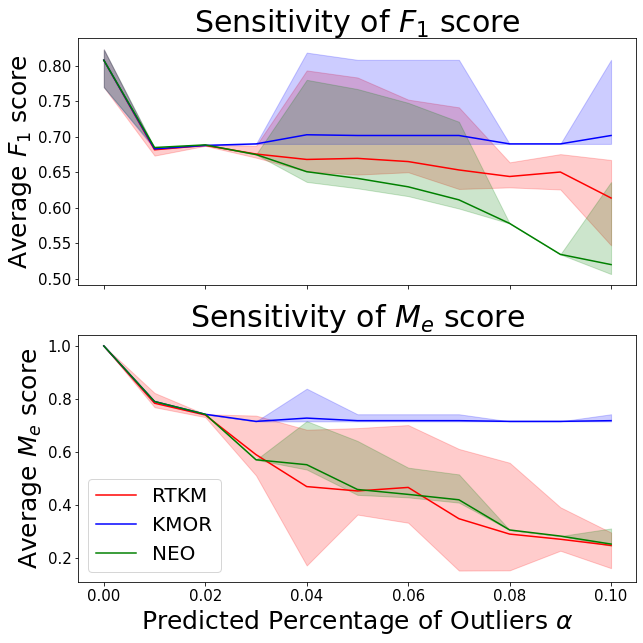

In [3]:
make_figure(dataset = 'new_shuttle', f1_rtkm= f1_rtkm, f1_kmor = f1_kmor, f1_neo = f1_neo, me_rtkm = me_rtkm,
            me_kmor = me_kmor, me_neo = me_neo, min_rtkm = min_rtkm, max_rtkm = max_rtkm, min_kmor = min_kmor, 
            max_kmor = max_kmor, min_neo = min_neo, max_neo = max_neo, alpha_vals = alpha_vals)